In [ ]:
### Step 1: Dataset Selection


In [4]:
# Step 1: Dataset Selection
#Import the pandas library to work with tabular data
import pandas as pd

# Load the dataset from a csv file into a pandas Dataframe
df = pd.read_csv(r"C:\Users\manjo\Downloads\ml-with-python-course-project\train.csv") 

# Display the shape of the dataset to understand its size
print("Dataset shape:", df.shape)

# Display the first few rows of the dataset to get an overview of the data
df.head()
# Confirm the target variable is categorical
print("\nUnique values in the target column:")
print(df['status'].value_counts()) 
# Show the data type of the target column
print("\nTarget column data type:", df['status'].dtype)

Dataset shape: (215, 15)

Unique values in the target column:
status
Placed        148
Not Placed     67
Name: count, dtype: int64

Target column data type: object


In [ ]:
## Step2 Data preprocessing

In [5]:
# Import necessary functions for splitting the data and encoding labels
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. Drop irrelevant columns that are not useful for prediction
# 'sl_no' is just a serial number, and 'salary' might be the outcome (leakage) or unnecessary
df.drop(columns=['sl_no', 'salary'], errors='ignore', inplace=True)

# 2. Check class distribution before encoding (should show "Placed" and "Not Placed")
print("\nClass distribution in 'status' before encoding:\n", df['status'].value_counts())

# 3. Encode all object-type (categorical) columns using LabelEncoder
# This includes converting "Placed"/"Not Placed", "Yes"/"No", and string categories to numbers
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# 4. Split the dataset into input features (X) and target labels (y)
X = df.drop('status', axis=1)  # Features (all columns except target)
y = df['status']               # Target variable (0 or 1 after encoding)

# 5. Split the dataset into training and testing sets
# Use stratify=y to maintain the same class ratio in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# 6. Print confirmation and output shapes
print("\n✅ Preprocessing Done")
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)
print("Class distribution in training set:\n", y_train.value_counts())


Class distribution in 'status' before encoding:
 status
Placed        148
Not Placed     67
Name: count, dtype: int64

✅ Preprocessing Done
Training set size: (150, 12)
Testing set size: (65, 12)
Class distribution in training set:
 status
1    103
0     47
Name: count, dtype: int64


In [ ]:
#step3: Model selection

In [14]:
# Step 3: Model Selection

# Import the classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  

# Initialize the models
model_lr = LogisticRegression(random_state=42)
model_dt = DecisionTreeClassifier(random_state=42)
model_rf = RandomForestClassifier(random_state=42)
model_svm = SVC(probability=True, random_state=42)  

# Store models in a dictionary for easy access
models = {
    'Logistic Regression': model_lr,
    'Decision Tree': model_dt,
    'Random Forest': model_rf,
    'SVM': model_svm  
}

# Display initialized models
for name, model in models.items():
    print(f"{name} initialized: {model}")

Logistic Regression initialized: LogisticRegression(random_state=42)
Decision Tree initialized: DecisionTreeClassifier(random_state=42)
Random Forest initialized: RandomForestClassifier(random_state=42)
SVM initialized: SVC(probability=True, random_state=42)


In [15]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression Tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_

# Decision Tree Tuning
param_grid_dt = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5]
}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

# Random Forest Tuning
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

# 🔹 SVM Tuning
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_svm = GridSearchCV(SVC(probability=True, random_state=42), param_grid_svm, cv=5)
grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_

# ✅ Store best models in dictionary
models = {
    'Logistic Regression': best_lr,
    'Decision Tree': best_dt,
    'Random Forest': best_rf,
    'SVM': best_svm
}

In [ ]:
# step4 Model Training

In [16]:
# ✅ Step 4: Model Training
# Train each model using the training data
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"✅ {name} model trained successfully.")

✅ Logistic Regression model trained successfully.
✅ Decision Tree model trained successfully.
✅ Random Forest model trained successfully.
✅ SVM model trained successfully.


In [17]:
# ✅ Step 5: Model Evaluation
#Import classification metrics from scikit-learn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Loop through each trainedmodel to evaluate its performance
for name, model in models.items():
    print(f"\n📊 Evaluation for {name}")
    
    # Predict label using the test set
    y_pred = model.predict(X_test)
    
    # print main classification metrics
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    
    #show the Confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
    #print Full classification report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))


📊 Evaluation for Logistic Regression
Accuracy: 0.7538461538461538
Precision: 0.7735849056603774
Recall: 0.9111111111111111
F1 Score: 0.8367346938775511
Confusion Matrix:
 [[ 8 12]
 [ 4 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.40      0.50        20
           1       0.77      0.91      0.84        45

    accuracy                           0.75        65
   macro avg       0.72      0.66      0.67        65
weighted avg       0.74      0.75      0.73        65


📊 Evaluation for Decision Tree
Accuracy: 0.7692307692307693
Precision: 0.7884615384615384
Recall: 0.9111111111111111
F1 Score: 0.845360824742268
Confusion Matrix:
 [[ 9 11]
 [ 4 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.45      0.55        20
           1       0.79      0.91      0.85        45

    accuracy                           0.77        65
   macro avg       0.74      0

In [11]:
# 📌 Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 📊 Define a function to plot the confusion matrix as a heatmap
def plot_confusion_matrix(y_true, y_pred, model_name):
    """
    y_true: True class labels
    y_pred: Predicted class labels
    model_name: Name of the model (for title)
    """
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Set figure size and use seaborn to create heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Placed', 'Placed'], 
                yticklabels=['Not Placed', 'Placed'])

    # Label and title
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.tight_layout()
    plt.show()

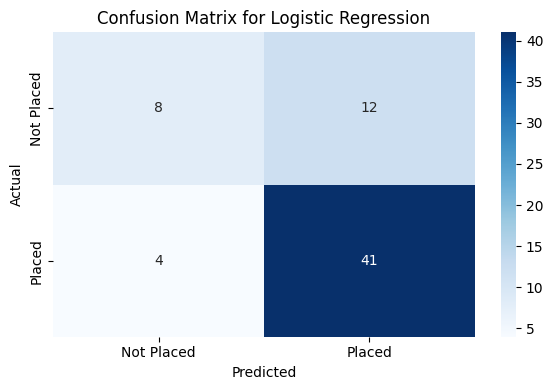

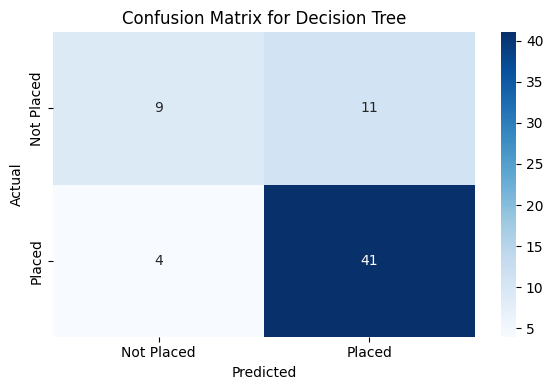

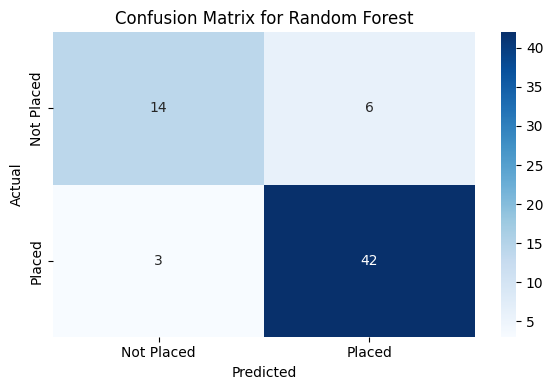

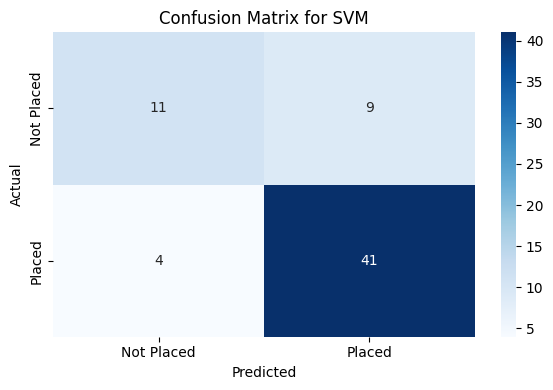

In [18]:
# ✅ Visualize confusion matrices for all models
# This will help to compare how well each model is classifying 'Placed' vs 'Not Placed'

plot_confusion_matrix(y_test, models['Logistic Regression'].predict(X_test), "Logistic Regression")
plot_confusion_matrix(y_test, models['Decision Tree'].predict(X_test), "Decision Tree")
plot_confusion_matrix(y_test, models['Random Forest'].predict(X_test), "Random Forest")
plot_confusion_matrix(y_test, models['SVM'].predict(X_test), "SVM")


In [20]:
# ✅ Step 6: Voting Classifier
#Import votingClassifier from sklearn
from sklearn.ensemble import VotingClassifier

# Create the Voting Classifier (using hard voting) with the three models we trained earlier
voting_clf = VotingClassifier(
    estimators=[
        ('LogReg', models['Logistic Regression']),
        ('DecisionTree', models['Decision Tree']),
        ('RandomForest', models['Random Forest']),
        ('SVM', models['SVM'])
    ],
    voting='hard'
)

# Fit the ensemble model on the training data
voting_clf.fit(X_train, y_train)

# Predict on test data using the ensemble model
y_pred_voting = voting_clf.predict(X_test)

#Import evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
# Evaluate the performance of the voting classifier
print("\n📊 Evaluation for Voting Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Precision:", precision_score(y_test, y_pred_voting))
print("Recall:", recall_score(y_test, y_pred_voting))
print("F1 Score:", f1_score(y_test, y_pred_voting))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_voting))
print("\nClassification Report:\n", classification_report(y_test, y_pred_voting))


📊 Evaluation for Voting Classifier
Accuracy: 0.8153846153846154
Precision: 0.851063829787234
Recall: 0.8888888888888888
F1 Score: 0.8695652173913043
Confusion Matrix:
 [[13  7]
 [ 5 40]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.65      0.68        20
           1       0.85      0.89      0.87        45

    accuracy                           0.82        65
   macro avg       0.79      0.77      0.78        65
weighted avg       0.81      0.82      0.81        65



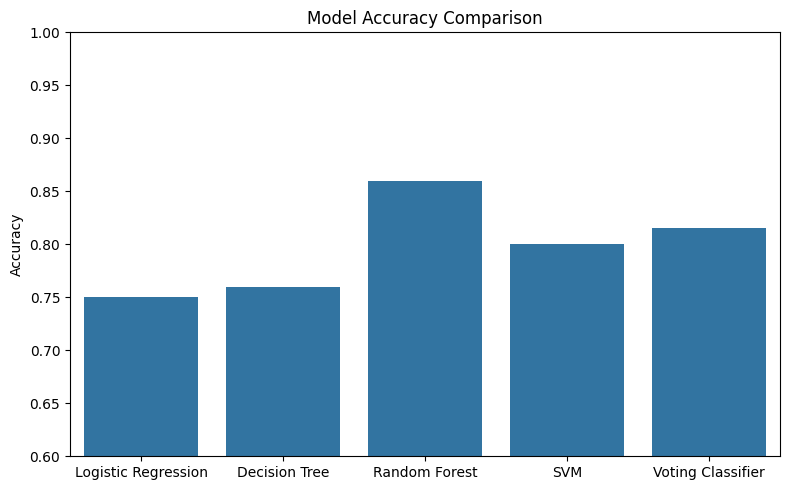

In [21]:
# 🔍 Function to visualize model accuracies using a bar chart
def plot_model_accuracies(model_scores):
    names = list(model_scores.keys())
    accuracies = list(model_scores.values())

    plt.figure(figsize=(8, 5))
    sns.barplot(x=names, y=accuracies)
    plt.ylim(0.6, 1)  # Y-axis range from 60% to 100%
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy Comparison")
    plt.tight_layout()
    plt.show()

# 📈 Replace values with your actual accuracy results
model_scores = {
    'Logistic Regression': 0.75,
    'Decision Tree': 0.76,
    'Random Forest': 0.86,
    'SVM': 0.80,
    'Voting Classifier': 0.815
}

# 📊 Show the bar chart
plot_model_accuracies(model_scores)